<a href="https://colab.research.google.com/github/Damanger/COLAB_CF/blob/main/news.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
sns.set_style("whitegrid")
plt.style.use("fivethirtyeight")

In [ ]:
news = pd.read_json('/content/drive/MyDrive/News_Category_Dataset_v3.json')

In [ ]:
news['category'].unique()

array(['U.S. NEWS', 'COMEDY', 'PARENTING', 'WORLD NEWS', 'CULTURE & ARTS',
       'TECH', 'SPORTS', 'ENTERTAINMENT', 'POLITICS', 'WEIRD NEWS',
       'ENVIRONMENT', 'EDUCATION', 'CRIME', 'SCIENCE', 'WELLNESS',
       'BUSINESS', 'STYLE & BEAUTY', 'FOOD & DRINK', 'MEDIA',
       'QUEER VOICES', 'HOME & LIVING', 'WOMEN', 'BLACK VOICES', 'TRAVEL',
       'MONEY', 'RELIGION', 'LATINO VOICES', 'IMPACT', 'WEDDINGS'],
      dtype=object)

In [ ]:
len(list(news['category'].unique()))

29

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28],
 [Text(0, 0, 'U.S. NEWS'),
  Text(1, 0, 'COMEDY'),
  Text(2, 0, 'PARENTING'),
  Text(3, 0, 'WORLD NEWS'),
  Text(4, 0, 'CULTURE & ARTS'),
  Text(5, 0, 'TECH'),
  Text(6, 0, 'SPORTS'),
  Text(7, 0, 'ENTERTAINMENT'),
  Text(8, 0, 'POLITICS'),
  Text(9, 0, 'WEIRD NEWS'),
  Text(10, 0, 'ENVIRONMENT'),
  Text(11, 0, 'EDUCATION'),
  Text(12, 0, 'CRIME'),
  Text(13, 0, 'SCIENCE'),
  Text(14, 0, 'WELLNESS'),
  Text(15, 0, 'BUSINESS'),
  Text(16, 0, 'STYLE & BEAUTY'),
  Text(17, 0, 'FOOD & DRINK'),
  Text(18, 0, 'MEDIA'),
  Text(19, 0, 'QUEER VOICES'),
  Text(20, 0, 'HOME & LIVING'),
  Text(21, 0, 'WOMEN'),
  Text(22, 0, 'BLACK VOICES'),
  Text(23, 0, 'TRAVEL'),
  Text(24, 0, 'MONEY'),
  Text(25, 0, 'RELIGION'),
  Text(26, 0, 'LATINO VOICES'),
  Text(27, 0, 'IMPACT'),
  Text(28, 0, 'WEDDINGS')])

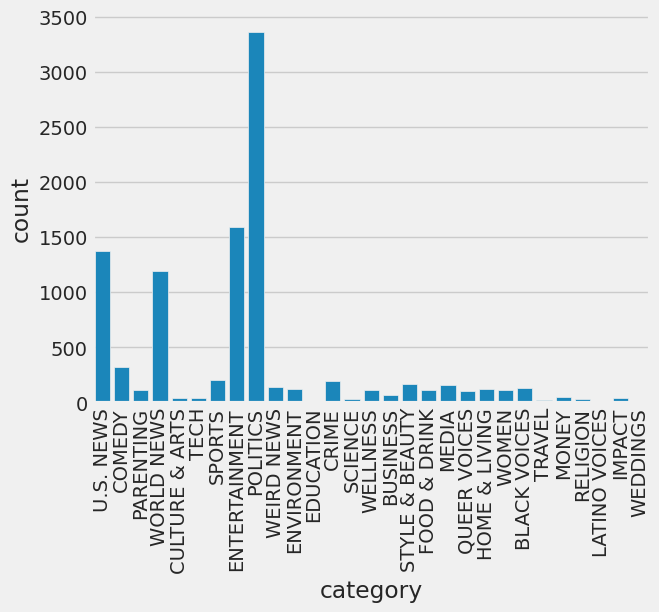

In [ ]:
sns.countplot(x='category', data = news)
plt.xticks(rotation=90)

<Axes: title={'center': 'Número de noticias por categoría'}, xlabel='category'>

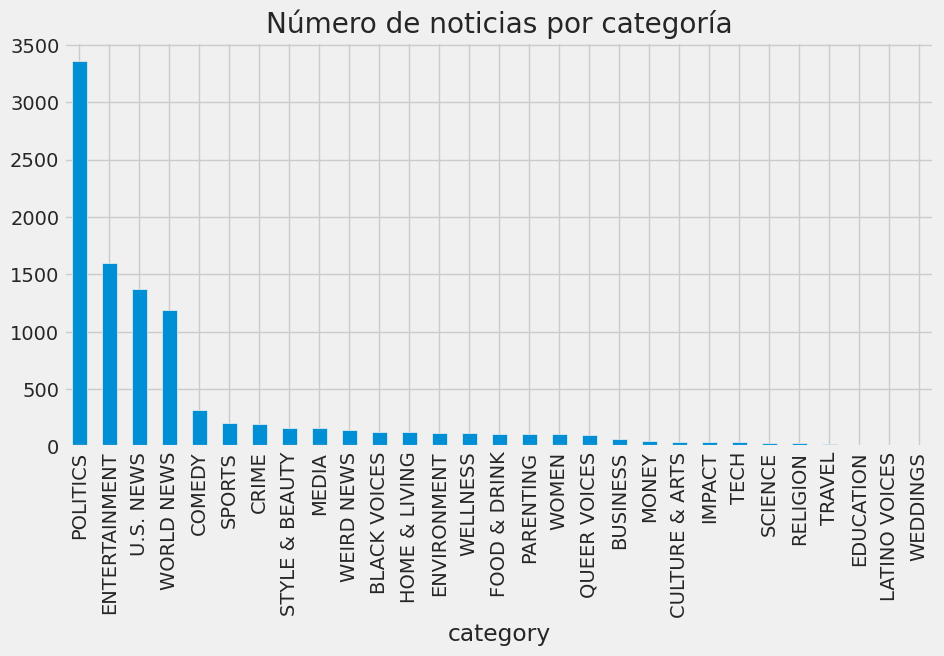

In [ ]:
news['category'].value_counts().plot(kind='bar', figsize=(10, 5), title = 'Número de noticias por categoría', fontsize=14)

In [ ]:
data = news[(news.category == "U.S. NEWS")]

In [ ]:
txt = data['headline'].loc[0]
txt

'American Airlines Flyer Charged, Banned For Life After Punching Flight Attendant On Video'

In [ ]:
def clean(s):
  try:
    if s != None and len(s) > 0:
      s = s.lower()
      output = []
      for c in list(s):
        if c >= 'a' and c <= 'z':
          output.append(c)
        else:
          output.append(' ')
          tmp = ''.join(output).split()
      return ' '.join(tmp)
    else:
      return ''
  except:
    return ''

In [ ]:
clean(txt)

'american airlines flyer charged banned for life after punching flight attendant on'

In [ ]:
data["headline_clean"] = data["headline"].apply(lambda x: clean(x))

<ipython-input-13-b28673804d09>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["headline_clean"] = data["headline"].apply(lambda x: clean(x))


In [ ]:
data[['headline_clean', 'headline']]

,headline_clean,headline
0,american airlines flyer charged banned for lif...,"American Airlines Flyer Charged, Banned For Li..."
2,over million americans roll up sleeves for omi...,Over 4 Million Americans Roll Up Sleeves For O...
4,woman who called cops on black bird watcher lo...,Woman Who Called Cops On Black Bird-Watcher Lo...
5,cleaner was dead in belk bathroom for days bef...,Cleaner Was Dead In Belk Bathroom For 4 Days B...
6,reporter gets adorable surprise from her boyfr...,Reporter Gets Adorable Surprise From Her Boyfr...
...,...,...
8666,battered woman slips note to dog s vet about a...,Battered Woman Slips Note To Dog's Vet About A...
8667,every grave in minnesota military cemetery get...,Every Grave In Minnesota Military Cemetery Get...
8668,retired english teacher corrects trump signed ...,Retired English Teacher Corrects Trump-Signed ...
8670,subtropical storm alberto barrels up gulf coas...,Subtropical Storm Alberto Barrels Up Gulf Coas...


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
text = [data.iloc[0]['headline_clean']]
#text = ['this is an example of this', 'mikel is an example']

In [ ]:
vect = CountVectorizer()
#Tokenize and build vocab
#vect.fit(text)
vect.fit(list(data['headline_clean'].values[:5]))

CountVectorizer()

In [ ]:
vect.vocabulary_

{'american': 4,
 'airlines': 3,
 'flyer': 24,
 'charged': 16,
 'banned': 7,
 'for': 25,
 'life': 32,
 'after': 1,
 'punching': 39,
 'flight': 23,
 'attendant': 6,
 'on': 37,
 'over': 38,
 'million': 35,
 'americans': 5,
 'roll': 41,
 'up': 45,
 'sleeves': 42,
 'omicron': 36,
 'targeted': 44,
 'covid': 19,
 'woman': 50,
 'who': 49,
 'called': 15,
 'cops': 18,
 'black': 12,
 'bird': 11,
 'watcher': 47,
 'loses': 34,
 'lawsuit': 31,
 'against': 2,
 'ex': 22,
 'cleaner': 17,
 'was': 46,
 'dead': 21,
 'in': 30,
 'belk': 10,
 'bathroom': 8,
 'days': 20,
 'before': 9,
 'body': 13,
 'found': 26,
 'reporter': 40,
 'gets': 28,
 'adorable': 0,
 'surprise': 43,
 'from': 27,
 'her': 29,
 'boyfriend': 14,
 'while': 48,
 'live': 33}

In [ ]:
vect = vect.transform(text)

In [ ]:
vect

<1x51 sparse matrix of type '<class 'numpy.int64'>'
	with 12 stored elements in Compressed Sparse Row format>

In [ ]:
# Summarize encoded vector
print(vect.shape)
print(vect.toarray())

(1, 51)
[[0 1 0 1 1 0 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 1 0 0 0
  0 1 0 1 0 0 0 0 0 0 0 0 0 0 0]]


In [ ]:
vect.todense()

matrix([[0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
         0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0]])

In [ ]:
import string
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [ ]:
def text_process(text):
  """
  Takes in a string of text, then performs the following:
  1. Remove all punctuation
  2. Remove all stopwords
  3. Returns a list of the cleaned text
  """
  STOPWORDS = stopwords.words('english') + ['u', 'ü', 'ur', '4', '2', 'im', 'dont', 'doin', 'ure']
  # Check characters to see if they are in punctuation
  nopuc = [char for char in text if char not in string.punctuation]

  # Join the character again to form the string
  nopuc = ''.join(nopuc)

  # Now just remove any stopwords
  return " ".join([word for word in nopuc.split() if word.lower() not in STOPWORDS])

In [ ]:
print('Processed text: ' + text_process(txt))
print('Actual text: ' + txt)

Processed text: American Airlines Flyer Charged Banned Life Punching Flight Attendant Video
Actual text: American Airlines Flyer Charged, Banned For Life After Punching Flight Attendant On Video


In [ ]:
categories = list(data['category'].unique())
categories

['U.S. NEWS']

In [ ]:
def num_words(txt):
  return len(txt.split())

In [ ]:
num_words(txt)

13

In [ ]:
data['num_words'] = data['headline_clean'].apply(lambda x: num_words(x))
data['headline_nonstop'] = data['headline_clean'].apply(lambda x: text_process(x))

<ipython-input-49-17078081a51f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['num_words'] = data['headline_clean'].apply(lambda x: num_words(x))
<ipython-input-49-17078081a51f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['headline_nonstop'] = data['headline_clean'].apply(lambda x: text_process(x))


In [ ]:
data[['headline', 'headline_clean', 'headline_nonstop', 'num_words']].head()

,headline,headline_clean,headline_nonstop,num_words
0,"American Airlines Flyer Charged, Banned For Li...",american airlines flyer charged banned for lif...,american airlines flyer charged banned life pu...,12
2,Over 4 Million Americans Roll Up Sleeves For O...,over million americans roll up sleeves for omi...,million americans roll sleeves omicron targete...,10
4,Woman Who Called Cops On Black Bird-Watcher Lo...,woman who called cops on black bird watcher lo...,woman called cops black bird watcher loses law...,12
5,Cleaner Was Dead In Belk Bathroom For 4 Days B...,cleaner was dead in belk bathroom for days bef...,cleaner dead belk bathroom days body found,11
6,Reporter Gets Adorable Surprise From Her Boyfr...,reporter gets adorable surprise from her boyfr...,reporter gets adorable surprise boyfriend live,10


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

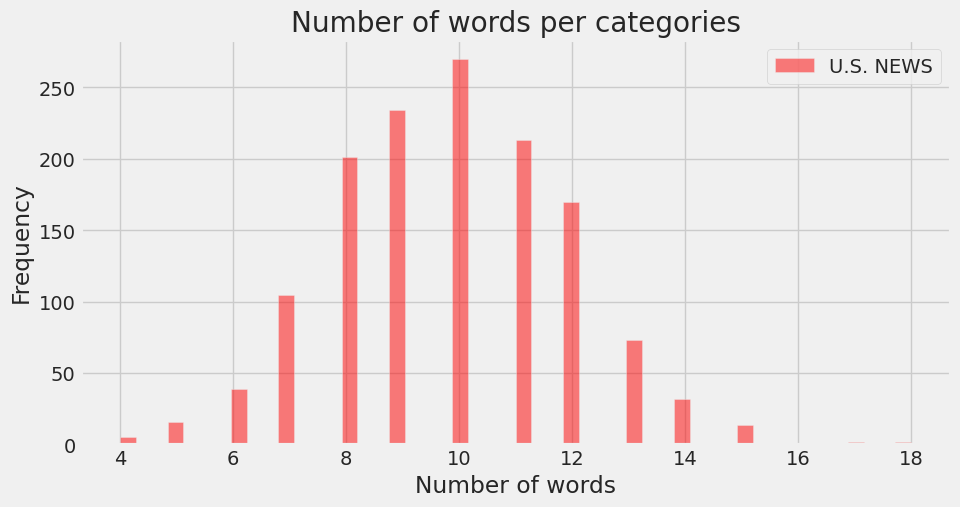

In [ ]:
plt.figure(figsize=(10, 5))
colors = ['red', 'green', 'blue', 'yellow']
for i in range(len(categories)):
  data[data.category == categories[i]]['num_words'].plot(kind='hist', bins=50, alpha=0.5, label=categories[i], color=colors[i])
plt.legend(loc='upper right')
plt.title('Number of words per categories')
plt.xlabel('Number of words')
plt.ylabel('Frequency')
plt

In [ ]:
vectorizer = CountVectorizer()
vectorizer.fit(list(data['headline_nonstop'].values))

CountVectorizer()

In [ ]:
vector = vectorizer.transform(text)
vector.shape

(1, 4109)